<img src='./img/jupyter_logo.png' align='right' width='30%'></img>

<a href="./00_index.ipynb"><< 00 - Index</a><span style="float:right;"><a href="./02_jupyter_notebooks_key_concepts.ipynb">02 - Jupyter Notebooks - Key concepts >></a></span>

<div class="alert alert-block alert-danger">
<b>DO NOT COPY THIS EXAMPLE</b> 
</div>

# Example notebook - Data load with xarray

Load libraries

In [2]:
import xarray as xr

## Load data

In [10]:
subset = xr.open_dataset('./data/subset.nc')
subset

<xarray.Dataset>
Dimensions:                              (ground_pixel: 450, scanline: 1060, time: 1)
Coordinates:
  * scanline                             (scanline) float64 2.802e+03 ... 3.861e+03
  * ground_pixel                         (ground_pixel) float64 0.0 ... 449.0
  * time                                 (time) datetime64[ns] 2019-12-29
    latitude                             (time, scanline, ground_pixel) float32 ...
    longitude                            (time, scanline, ground_pixel) float32 ...
Data variables:
    nitrogendioxide_tropospheric_column  (time, scanline, ground_pixel) float32 ...

## An empty Markdown cell

## Load variable

In [11]:
no2 = subset['nitrogendioxide_tropospheric_column']
no2

<xarray.DataArray 'nitrogendioxide_tropospheric_column' (time: 1, scanline: 1060, ground_pixel: 450)>
[477000 values with dtype=float32]
Coordinates:
  * scanline      (scanline) float64 2.802e+03 2.803e+03 ... 3.86e+03 3.861e+03
  * ground_pixel  (ground_pixel) float64 0.0 1.0 2.0 3.0 ... 447.0 448.0 449.0
  * time          (time) datetime64[ns] 2019-12-29
    latitude      (time, scanline, ground_pixel) float32 ...
    longitude     (time, scanline, ground_pixel) float32 ...
Attributes:
    units:                                                 mol m-2
    standard_name:                                         troposphere_mole_c...
    long_name:                                             Tropospheric verti...
    ancillary_variables:                                   nitrogendioxide_tr...
    multiplication_factor_to_convert_to_molecules_percm2:  6.02214e+19

## Plot data

In [12]:
latitude = no2.latitude
longitude = no2.longitude
data_array = no2[0,:,:]*no2.multiplication_factor_to_convert_to_molecules_percm2
data_array

<xarray.DataArray 'nitrogendioxide_tropospheric_column' (scanline: 1060, ground_pixel: 450)>
array([[         nan,          nan,          nan, ..., 3.297793e+14,
        8.718117e+14, 9.144003e+14],
       [         nan,          nan,          nan, ..., 3.813104e+14,
        2.276391e+14, 5.039152e+14],
       [         nan,          nan,          nan, ..., 5.154306e+14,
        1.441794e+14, 5.554444e+14],
       ...,
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan]], dtype=float32)
Coordinates:
  * scanline      (scanline) float64 2.802e+03 2.803e+03 ... 3.86e+03 3.861e+03
  * ground_pixel  (ground_pixel) float64 0.0 1.0 2.0 3.0 ... 447.0 448.0 449.0
    time          datetime64[ns] 2019-12-29
    latitude      (scanline

In [13]:
from matplotlib import pyplot as plt
import matplotlib.colors
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature

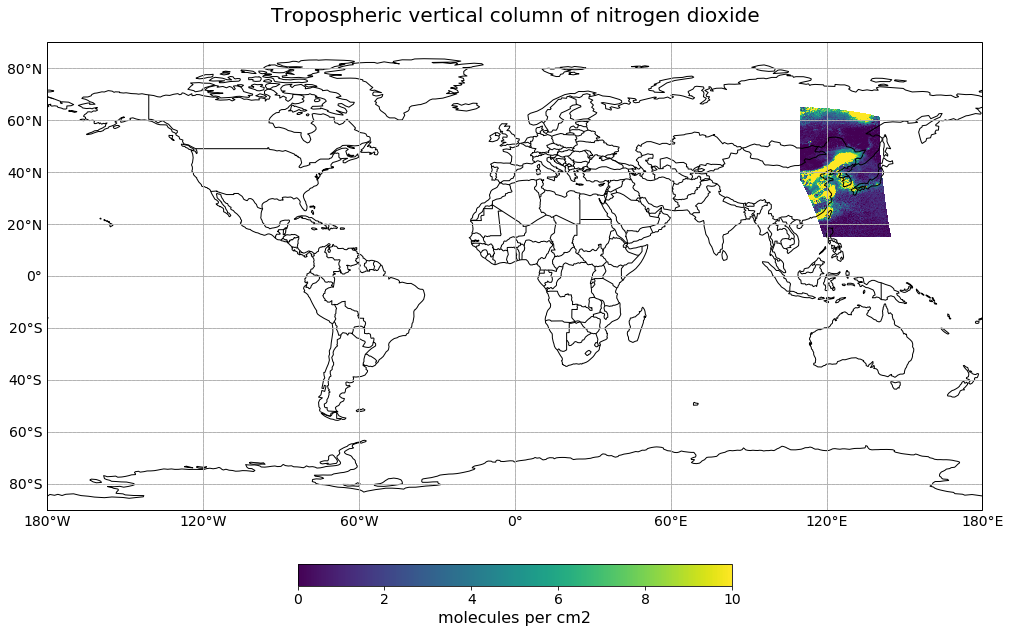

In [14]:
fig=plt.figure(figsize=(20, 10))

ax = plt.axes(projection=ccrs.PlateCarree())

    # define the coordinate system that the grid lons and grid lats are on


img = plt.pcolormesh(longitude[0,:,:], latitude[0,:,:], data_array*1e-15, 
                    cmap=plt.get_cmap('viridis'), transform=ccrs.PlateCarree(),
                    vmin=0,
                    vmax=10)

ax.add_feature(cfeature.BORDERS, edgecolor='black', linewidth=1)
ax.add_feature(cfeature.COASTLINE, edgecolor='black', linewidth=1)

#ax.set_extent([110, 170, 15, 65], ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True, linestyle='--')
gl.xlabels_top=False
gl.ylabels_right=False
gl.xformatter=LONGITUDE_FORMATTER
gl.yformatter=LATITUDE_FORMATTER
gl.xlabel_style={'size':14}
gl.ylabel_style={'size':14}

ax.set_global()
ax.gridlines()

cbar = fig.colorbar(img, ax=ax, orientation='horizontal', fraction=0.04, pad=0.1)
cbar.set_label('molecules per cm2', fontsize=16)
cbar.ax.tick_params(labelsize=14)
ax.set_title(no2.long_name, fontsize=20, pad=20.0)

 #   plt.show()
plt.show()

## Empty cells with no function